In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,lfilter
import cProfile
import pstats
from functools import wraps

In [3]:
def profile(output_file="cprofile.txt",sort_by='cumulative',lines_to_print=None,strip_dirs=False):
    """This function returns cprofile of the function"""
    def inner(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            _output_file = output_file or func.__name__ + '.prof'
            p_r = cProfile.Profile()
            p_r.enable()
            retval = func(*args, **kwargs)
            p_r.disable()
            #pr.dump_stats(_output_file)

            with open(_output_file, 'a+') as file:
                p_s = pstats.Stats(p_r, stream=file)
                if strip_dirs:
                    p_s.strip_dirs()
                if isinstance(sort_by, (tuple, list)):
                    p_s.sort_stats(*sort_by)
                else:
                    p_s.sort_stats(sort_by)
                p_s.print_stats(func)
                p_s.print_stats(lines_to_print)
            return retval

        return wrapper

    return inner


In [4]:
vol_data = pd.read_csv("detailDownVolsampled.csv")
print("We have data for {} min(1 sample per min)".format(len(vol_data)))

We have data for 7643 min(1 sample per min)


In [5]:
sampling_duration = 458580 # in sec (7643 X 60)
number_of_samples = 7643  
sampling_freq = .016 #(no of samples in 1 sec) 
cutoff_freq = 0.006  
nyq = 0.5 * sampling_freq  # Nyquist Frequency
order = 5
signal = vol_data["Auxiliary channel TU1 U(V)"]

In [6]:
@profile()
def plot_data(signal,time,filtered_signal):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.legend()
    plt.plot(time, signal, 'b-', label="data with noise")
    plt.subplot(1,2,2)
    plt.plot(time, filtered_signal, 'g-', linewidth=2, label='data without noise')
    plt.legend()

No handles with labels found to put in legend.


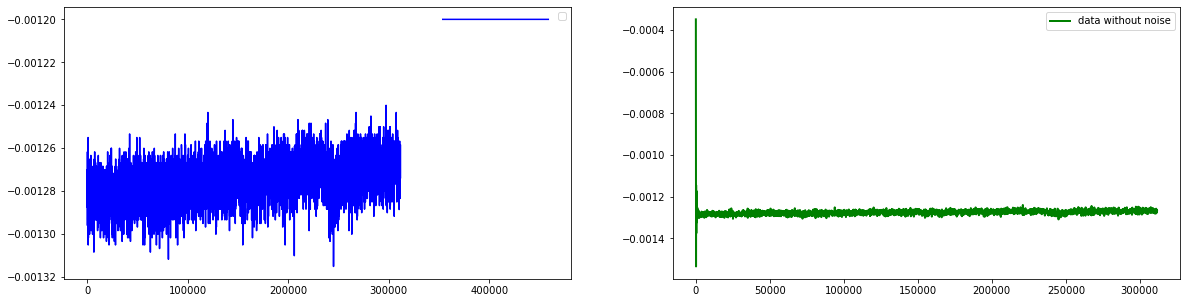

In [7]:
@profile()
def low_filter():
    normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
    numerator_coeffs, denominator_coeffs = butter(order, normalized_cutoff_freq)
    filtered_signal = lfilter(numerator_coeffs, denominator_coeffs, signal)
    time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)
    plot_data(signal,time,filtered_signal)
low_filter()

## Observation - 

1. We can see that first graph has lot variation in the plot because of the presence of the noise while in the second graph has less variation as applying filter has decreased the noise in the data